In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import math
from sklearn.model_selection import train_test_split

In [102]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
data.shape

(7043, 21)

In [104]:
data.duplicated().sum()

0

In [105]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [106]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [83]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [107]:
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in cat_columns:
    data[col] = data[col].astype('category')
    data[col+'_cat'] = data[col].cat.codes

In [108]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,Contract_cat,PaperlessBilling_cat,PaymentMethod_cat,Churn_cat
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,0,1,2,1


In [86]:
categories = {}
for col in cat_columns:
    categories[col] = data[col].cat.categories.to_list()
categories

{'gender': ['Female', 'Male'],
 'Partner': ['No', 'Yes'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'No phone service', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'No internet service', 'Yes'],
 'OnlineBackup': ['No', 'No internet service', 'Yes'],
 'DeviceProtection': ['No', 'No internet service', 'Yes'],
 'TechSupport': ['No', 'No internet service', 'Yes'],
 'StreamingTV': ['No', 'No internet service', 'Yes'],
 'StreamingMovies': ['No', 'No internet service', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['No', 'Yes'],
 'PaymentMethod': ['Bank transfer (automatic)',
  'Credit card (automatic)',
  'Electronic check',
  'Mailed check'],
 'Churn': ['No', 'Yes']}

In [109]:
data = data.drop(["customerID"]+cat_columns, axis=1)

In [110]:
data[data["TotalCharges"] == ' ']

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_cat,Partner_cat,Dependents_cat,PhoneService_cat,MultipleLines_cat,InternetService_cat,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,Contract_cat,PaperlessBilling_cat,PaymentMethod_cat,Churn_cat
488,0,0,52.55,,0,1,1,0,1,0,2,0,2,2,2,0,2,1,0,0
753,0,0,20.25,,1,0,1,1,0,2,1,1,1,1,1,1,2,0,3,0
936,0,0,80.85,,0,1,1,1,0,0,2,2,2,0,2,2,2,0,3,0
1082,0,0,25.75,,1,1,1,1,2,2,1,1,1,1,1,1,2,0,3,0
1340,0,0,56.05,,0,1,1,0,1,0,2,2,2,2,2,0,2,0,1,0
3331,0,0,19.85,,1,1,1,1,0,2,1,1,1,1,1,1,2,0,3,0
3826,0,0,25.35,,1,1,1,1,2,2,1,1,1,1,1,1,2,0,3,0
4380,0,0,20.00,,0,1,1,1,0,2,1,1,1,1,1,1,2,0,3,0
5218,0,0,19.70,,1,1,1,1,0,2,1,1,1,1,1,1,1,1,3,0
6670,0,0,73.35,,0,1,1,1,2,0,0,2,2,2,2,0,2,0,3,0


In [112]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].replace([np.inf, -np.inf], np.nan)

In [113]:
data.isna().sum()

SeniorCitizen            0
tenure                   0
MonthlyCharges           0
TotalCharges            11
gender_cat               0
Partner_cat              0
Dependents_cat           0
PhoneService_cat         0
MultipleLines_cat        0
InternetService_cat      0
OnlineSecurity_cat       0
OnlineBackup_cat         0
DeviceProtection_cat     0
TechSupport_cat          0
StreamingTV_cat          0
StreamingMovies_cat      0
Contract_cat             0
PaperlessBilling_cat     0
PaymentMethod_cat        0
Churn_cat                0
dtype: int64

In [114]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)

<ipython-input-114-6896a124d4a5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)


In [115]:
data.sample(9)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_cat,Partner_cat,Dependents_cat,PhoneService_cat,MultipleLines_cat,InternetService_cat,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,Contract_cat,PaperlessBilling_cat,PaymentMethod_cat,Churn_cat
4657,0,42,25.10,1097.15,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1629,0,68,70.95,4741.45,1,1,0,1,0,0,2,2,2,0,0,2,2,0,0,0
5367,0,65,82.50,5215.10,0,1,1,1,2,0,2,2,0,2,2,2,2,1,0,0
6265,0,2,45.25,74.20,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0
2895,0,37,19.85,717.50,0,1,0,1,0,2,1,1,1,1,1,1,1,1,0,0
4967,0,3,63.60,155.65,0,0,0,1,2,0,0,0,0,2,2,0,0,1,2,1
2054,0,2,49.40,106.55,0,0,0,1,2,0,0,0,0,0,0,0,0,1,2,1
1851,0,2,35.10,68.75,0,1,0,0,1,0,0,0,0,0,0,2,0,1,2,1
2644,0,18,33.50,600.00,1,0,0,0,1,0,0,2,2,0,0,0,0,1,1,1


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7043 non-null   int64  
 1   tenure                7043 non-null   int64  
 2   MonthlyCharges        7043 non-null   float64
 3   TotalCharges          7043 non-null   float64
 4   gender_cat            7043 non-null   int8   
 5   Partner_cat           7043 non-null   int8   
 6   Dependents_cat        7043 non-null   int8   
 7   PhoneService_cat      7043 non-null   int8   
 8   MultipleLines_cat     7043 non-null   int8   
 9   InternetService_cat   7043 non-null   int8   
 10  OnlineSecurity_cat    7043 non-null   int8   
 11  OnlineBackup_cat      7043 non-null   int8   
 12  DeviceProtection_cat  7043 non-null   int8   
 13  TechSupport_cat       7043 non-null   int8   
 14  StreamingTV_cat       7043 non-null   int8   
 15  StreamingMovies_cat  

In [ ]:
def plot_numeric_distributions(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols // 3) + 1
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
plot_numeric_distributions(data)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

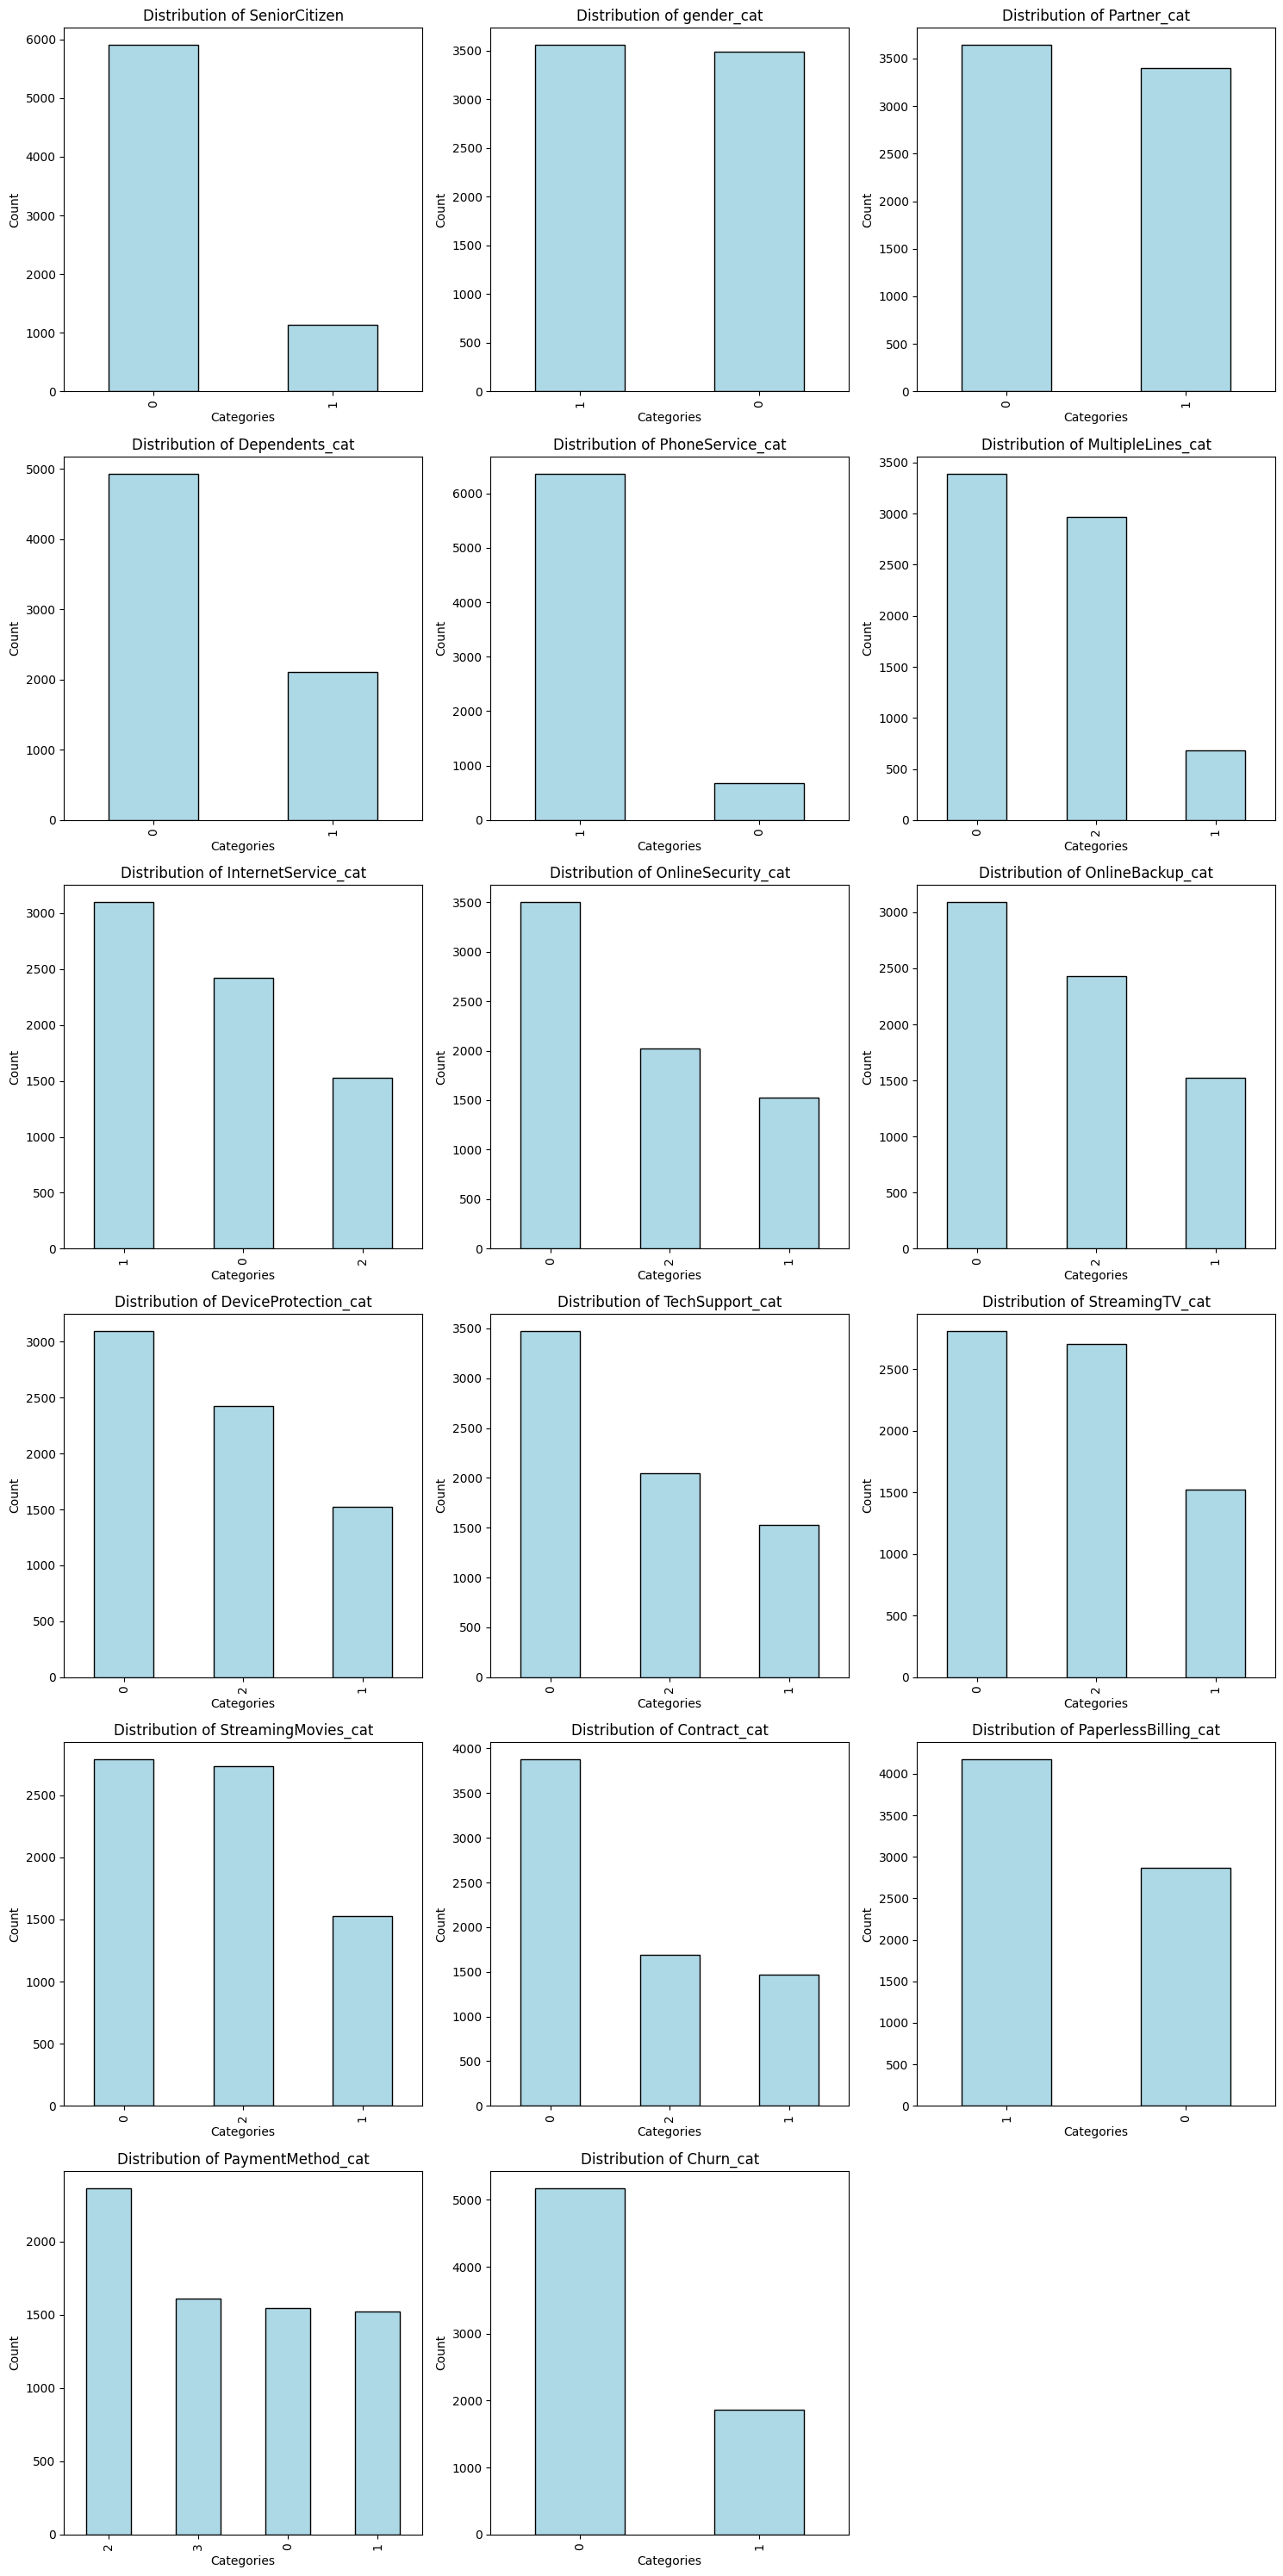

In [121]:
def plot_categorical_barcharts(df, max_unique=30):
    categorical_columns = [
        col for col in df.select_dtypes(include=['int8', 'int64']).columns
        if df[col].nunique() < max_unique
    ]

    num_columns = len(categorical_columns)
    if num_columns == 0:
        print(f"No categorical columns with less than {max_unique} unique values.")
        return
    num_rows = math.ceil(num_columns / 3)
    num_cols = min(3, num_columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        df[col].value_counts().plot.bar(
            ax=axes[i],
            color='lightblue',
            edgecolor='black'
        )
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('Categories')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plot_categorical_barcharts(data)

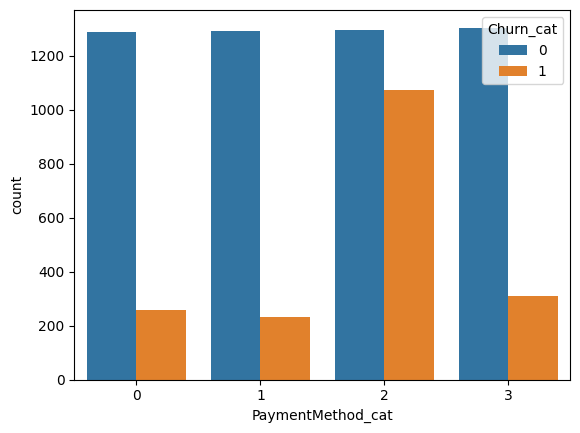

In [123]:
sns.countplot(x='PaymentMethod_cat', hue='Churn_cat', data=data)
plt.show()

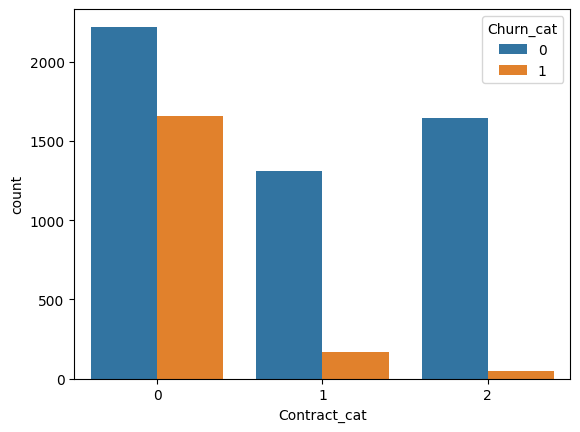

In [124]:
sns.countplot(x='Contract_cat', hue='Churn_cat', data=data)
plt.show()

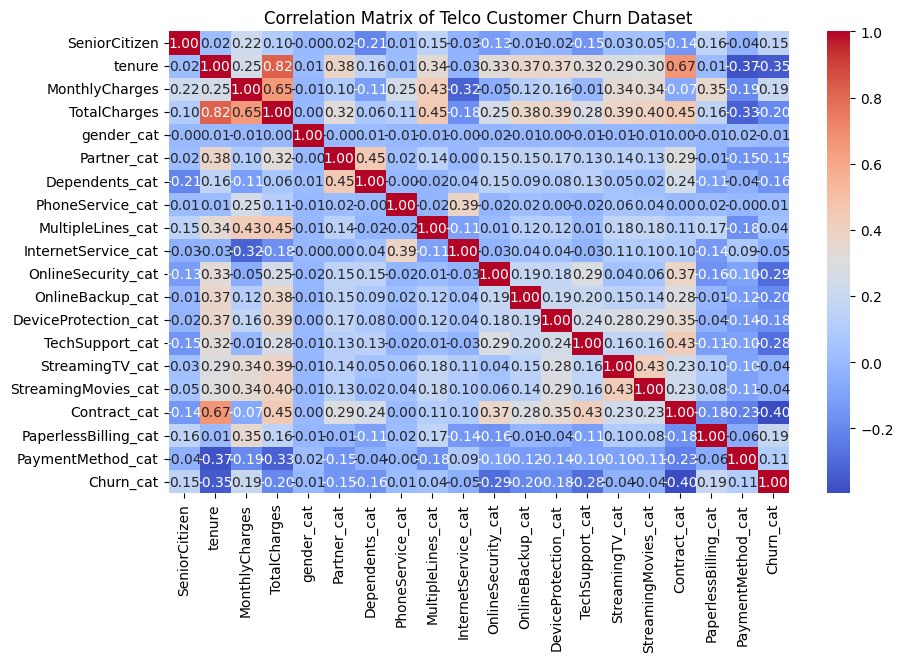

In [126]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Telco Customer Churn Dataset")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


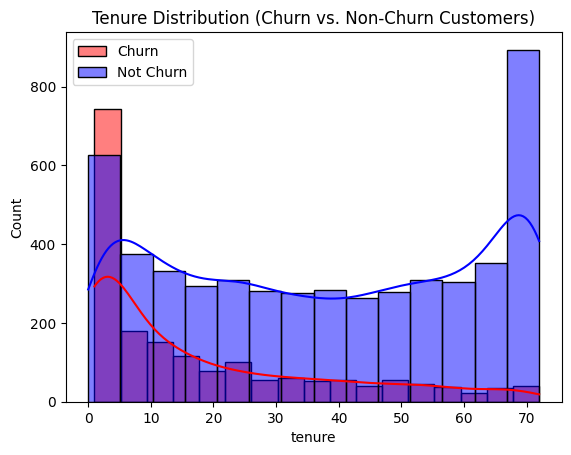

In [128]:
sns.histplot(data[data['Churn_cat'] == 1]['tenure'], color="red", label="Churn", kde=True)
sns.histplot(data[data['Churn_cat'] == 0]['tenure'], color="blue", label="Not Churn", kde=True)
plt.legend()
plt.title("Tenure Distribution (Churn vs. Non-Churn Customers)")
plt.show()

In [133]:
X = data.drop('Churn_cat',axis=1)
Y = data['Churn_cat']
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [134]:
!pip install lightgbm

In [142]:
!pip install tqdm

In [145]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
lgb_model = lgb.LGBMClassifier(boosting_type="gbdt", objective="binary", random_state=42)


param_grid = {
    'num_leaves': [31],  
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 300],  
    'max_depth': [-1, 10],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}


grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=0,
    n_jobs=-1
)


grid_search.fit(x_train, y_train, categorical_feature=[col+'_cat' for col in cat_columns if col != 'Churn'])


print("Best parameters:", grid_search.best_params_)


[LightGBM] [Info] Number of positive: 1385, number of negative: 3897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262211 -> initscore=-1.034507
[LightGBM] [Info] Start training from score -1.034507
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}


In [147]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Test Accuracy: 0.8154457694491766
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1277
           1       0.71      0.56      0.62       484

    accuracy                           0.82      1761
   macro avg       0.78      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



In [148]:
import pickle

with open("lightgbm_model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)
